In [1]:
from fipy import Variable, FaceVariable, CellVariable, Grid1D, ExplicitDiffusionTerm, TransientTerm, DiffusionTerm, Viewer
#from fipy.tools import numerix
from scipy.special import erf # doctest: +SCIPY>
import numpy as np
import matplotlib.pyplot as plt

## Solucion numerica del problema de difusión
### Conducción no estacionaria en tranferencia de calor

$$\frac{\partial T}{\partial t} = D \nabla^2 T.$$

#### Caso 1: Problema sólido sometido a una condición inicial de Temperatura.

In [69]:
### Geometría
nx = 50
Lx = 1.
dx = Lx/nx
#Definicion de una malla
mesh = Grid1D(Lx=Lx, dx = dx)
#acceso a los nodos de la malla
x = mesh.cellCenters[0]

#Definición de la variable solución del problema: T
T = CellVariable(name="Temperatura",mesh=mesh, value=0.)

#Valor Inicial de la solución
T.setValue(0)

#Parámetro Físico de la ecuacion: Difusión a

a = 1.

# Condiciones de Borde Dirichlet 0 y 1
valueLeft = 1
valueRight = 0
# Condicion de Borde Neuman en 0
GradValueLeft = -1  #estos es qs/lambda

# Aplicacion sobre la variable solucion del problema
T.constrain(valueRight, mesh.facesRight)
#T.constrain(valueLeft, mesh.facesLeft)
T.faceGrad.constrain(-1,mesh.facesLeft)

The largest stable timestep that can be taken for this explicit 1D diffusion problem is $\Delta t \le \Delta x^2 / (2 a).$
We limit our steps to 90% of that value for good measure

Estimación de un $\Delta t$ que permita una solución estable.

In [70]:
# Definicion de la variable tiempo
timeStepDuration = 0.5 * dx**2 / (2 * a)
steps = 100
t_final = timeStepDuration * steps

# Definición de la ecuación a resolver: Ecuacion de Fourier
# Se trata de un termino transitorio y un termino difusivo
eqX = TransientTerm() == ExplicitDiffusionTerm(coeff=a)  

#Opcional para este problema introductorio, comparación con el resultado analítico
T_Analytical = CellVariable(name="analytical value", mesh=mesh)
T_Analytical.setValue(1 - erf(x / (2 * np.sqrt(a * t_final)))) 
T_Analytical.setValue(0 - GradValueLeft *( np.sqrt(4*a*t_final/np.pi)*np.exp(-x**2/(4*a*t_final))-x*(1-erf(x/(4*a*t_final)**.5) ) ) )

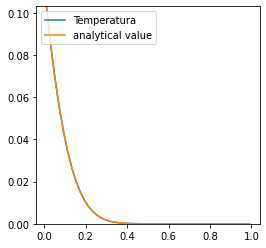

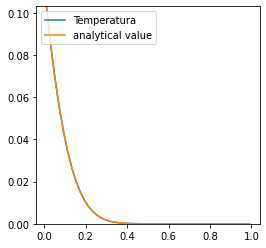

In [72]:
# Preparación de la salida gráfica. Se visualizará la solución y la referencia analítica
viewer = Viewer(vars=(T,T_Analytical) )

# Resolución de la ecuación diferencial para cada paso temporal 
for step in range(steps):
    eqX.solve(var=T,dt=timeStepDuration)
    if __name__ == '__main__':
        viewer.plot()#('1Dtransient_%0d.png'%step)
    

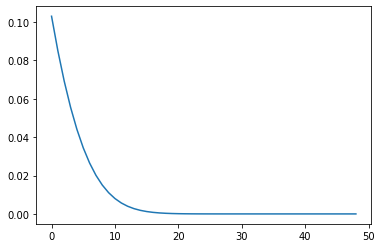

In [73]:
fig0,ax0 = plt.subplots()
ax0.plot(T.value)


### Caso 2: Condicion de borde periódica

In [10]:
nx = 50
Lx = 1.
dx = Lx/nx
mesh = Grid1D(Lx=Lx, dx = dx)

phi2 = CellVariable(name="solution variable",mesh=mesh)
phi2.setValue(0)
x = mesh.cellCenters[0]
time = Variable()
a = 1.


In [11]:
valueLeft = 1+ 0.5 * (1 + numerix.sin(.5*time))
fluxRight = -.5
phi2.constrain(valueLeft, mesh.facesLeft)
phi2.faceGrad.constrain([fluxRight], mesh.facesRight)
eqI = TransientTerm() == DiffusionTerm(coeff=a)

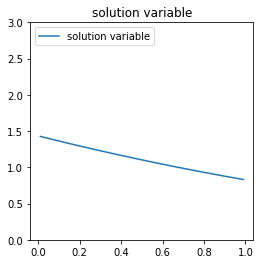

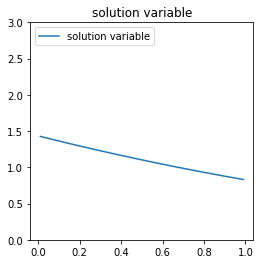

In [12]:
phiAnalytical = CellVariable(name="analytical value", mesh=mesh)
viewer2 = Viewer(vars=(phi2),datamin= 0,datamax=3);
dt = .5
while time() < 50:
    time.setValue(time() + dt)
    eqI.solve(var=phi2, dt=dt)
    if __name__ == '__main__':
        viewer2.plot()


Caso 3: D para distintos materiales. 

In [1]:
0.09**2/ (5/(5000*500))

4050.0

In [5]:
AA = '222222222222222222232222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222'
B = AA.split('3')[0]

In [6]:
len(B)

19